In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from numpy import sqrt
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import lag_plot

# Importing the Data

In [2]:
df=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
df.index.freq='MS'

In [3]:
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
df.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


In [5]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


### Performing EDA

In [7]:
df[df.duplicated()].shape

(0, 2)

In [8]:
df[df.duplicated()] # No Duplicate values found

,Quarter,Sales


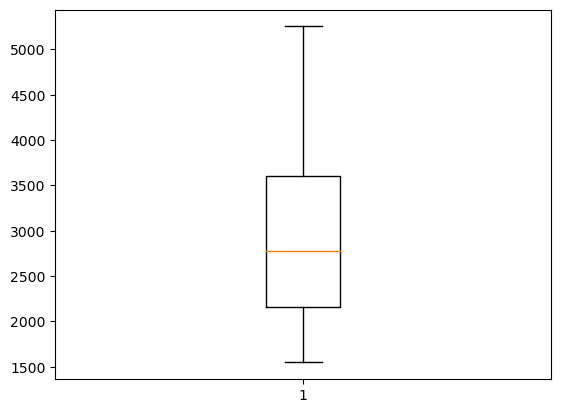

In [9]:
data_box=df.dropna()                     #No Outlier Detected hence no clening required
data_box1=data_box.Sales
plt.boxplot(data_box1)
plt.show()

In [10]:
# df=df.fillna(method="ffill") As there is no null values not required.

# Plotting a Simple line plot for Sales Data

<AxesSubplot:>

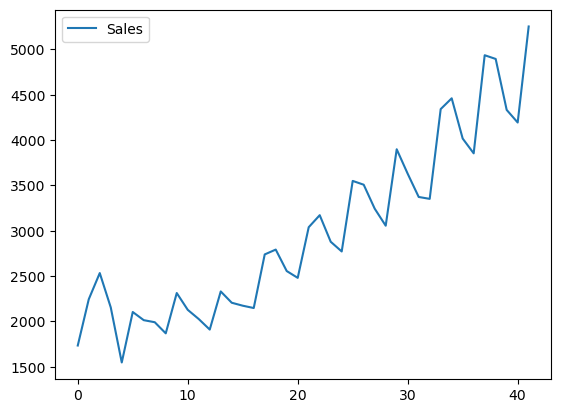

In [11]:
df.plot()

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

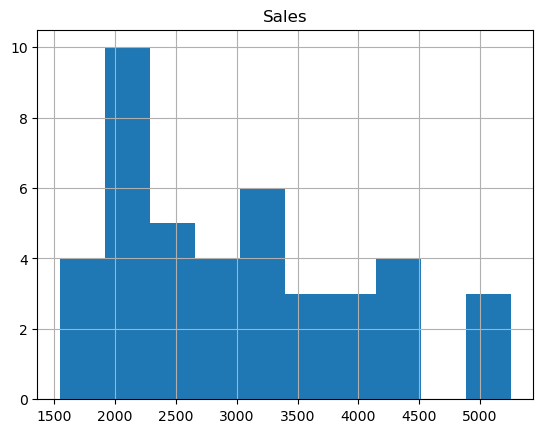

In [12]:
df.hist()

df.plot(kind='kde')

In [13]:
# there is a trend 
# there is seasonality 

# #1. Square Root Transformation

In [14]:
df['Sales']=sqrt(df['Sales'])

In [15]:
df.head()

,Quarter,Sales
0,Q1_86,41.651254
1,Q2_86,47.381019
2,Q3_86,50.336915
3,Q4_86,46.421579
4,Q1_87,39.342331


<AxesSubplot:ylabel='Density'>

<Figure size 1200x800 with 0 Axes>

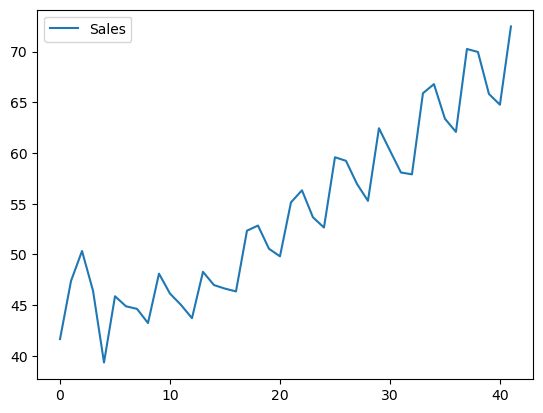

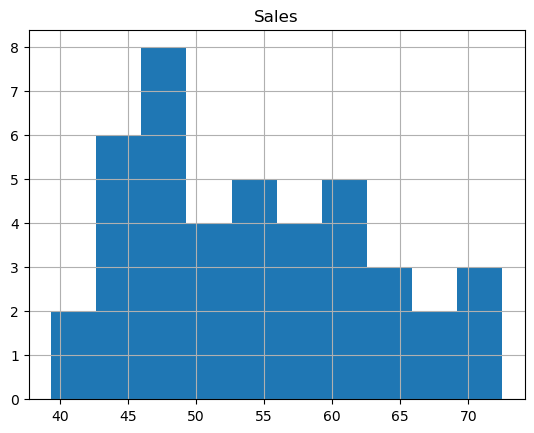

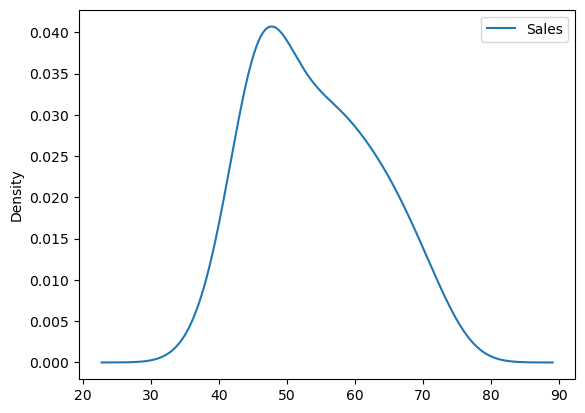

In [16]:
plt.figure(figsize=(12,8))
df.plot()
df.hist()
df.plot(kind='kde')

# Check for Seasonality in Data

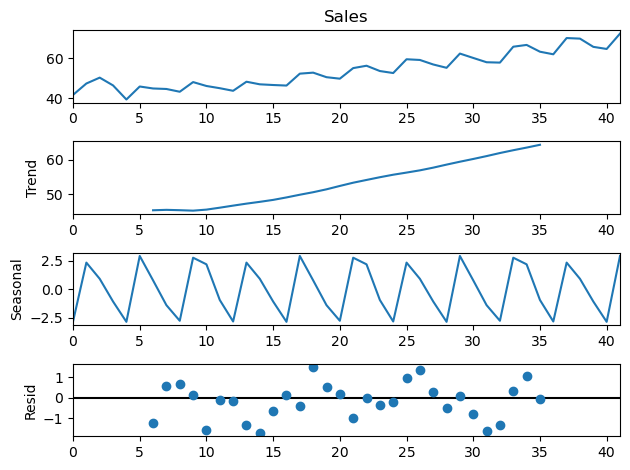

In [17]:
figsize = plt.figaspect(0.618) 
decompose_ts_add = seasonal_decompose(df.Sales,period=12)
decompose_ts_add.plot()
plt.show()

In [18]:
#From the above plots it is seen that there is Trend and Seasonality in the data

# Lag Plot

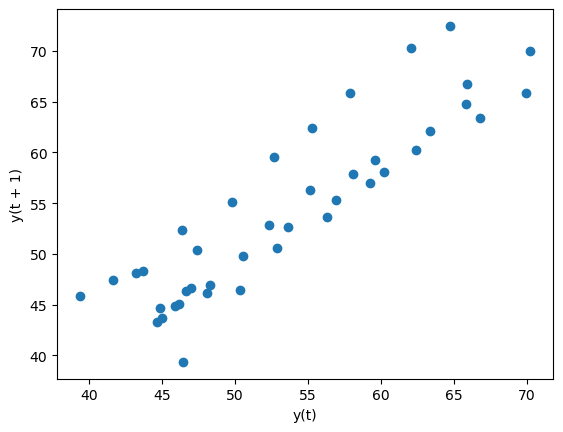

In [19]:
lag_plot(df['Sales'])
plt.show()

# ACF and PACF Plots

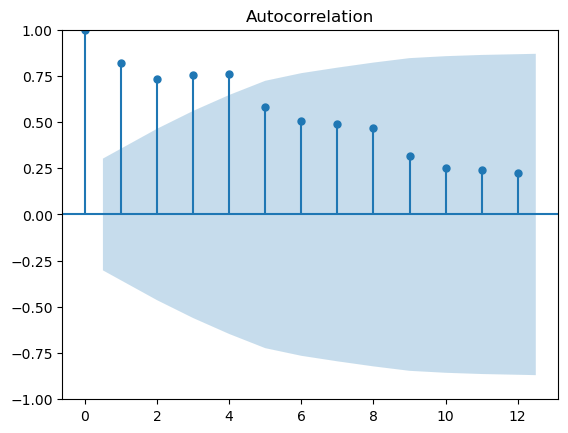

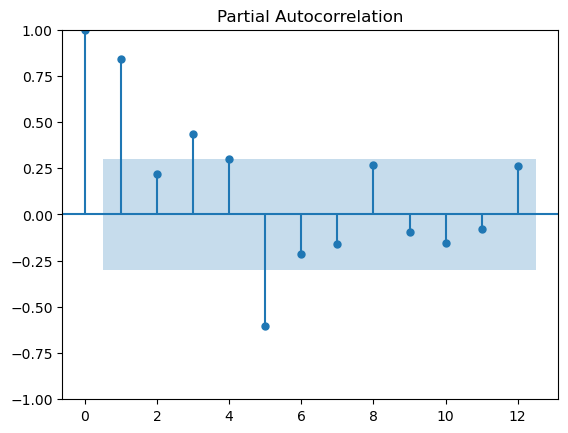

In [20]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Sales,lags=12)
tsa_plots.plot_pacf(df.Sales,lags=12)
plt.show()

# Performing Simple Exponential Smoothing

In [21]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
alpha=0.15

In [22]:
model_ses= SimpleExpSmoothing(df['Sales'])
fitted_model=model_ses.fit(smoothing_level=alpha,optimized=False)
fitted_model.fittedvalues

0     41.651254
1     41.651254
2     42.510719
3     43.684649
4     44.095188
5     43.382260
6     43.756001
7     43.924849
8     44.030471
9     43.910777
10    44.539195
11    44.778373
12    44.814665
13    44.649034
14    45.193999
15    45.460989
16    45.635715
17    45.742786
18    46.732128
19    47.649286
20    48.085442
21    48.344033
22    49.362208
23    50.406108
24    50.893640
25    51.157062
26    52.420784
27    53.441922
28    53.968868
29    54.165703
30    55.407143
31    56.132249
32    56.424042
33    56.644905
34    58.032247
35    59.346018
36    59.951086
37    60.270512
38    61.768436
39    62.997812
40    63.421969
41    63.622839
dtype: float64

In [23]:
df['SES']=fitted_model.fittedvalues.shift(-1)
df.head()

,Quarter,Sales,SES
0,Q1_86,41.651254,41.651254
1,Q2_86,47.381019,42.510719
2,Q3_86,50.336915,43.684649
3,Q4_86,46.421579,44.095188
4,Q1_87,39.342331,43.382260


# Performing Double Exponential Smoothing

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
mod_add12= ExponentialSmoothing(df['Sales'],trend='add')
fitted_model=mod_add12.fit()

In [25]:
df['DES']=fitted_model.fittedvalues.shift(-1)
df.head()

,Quarter,Sales,SES,DES
0,Q1_86,41.651254,41.651254,43.478408
1,Q2_86,47.381019,42.510719,44.297306
2,Q3_86,50.336915,43.684649,45.743994
3,Q4_86,46.421579,44.095188,46.192067
4,Q1_87,39.342331,43.382260,44.954153


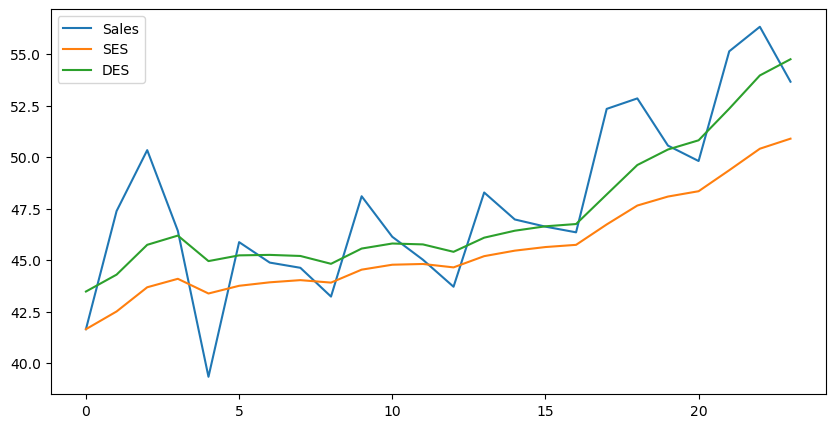

In [26]:
df[['Sales',"SES",'DES']].iloc[:24].plot(figsize=(10,5));

From the above plot it is seen that SES and DES cannot handle data with trend and seasonality hence performing Holt Winter Method

# Performing Holt Winters Method

In [27]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing        # triple Exponential Smoothing (holt winter method)

# Split the data by Train Test Split

In [28]:
train_data=df.iloc[:30]  #Spliting the data - taking train data as 30 and test data as 12
test_data=df.iloc[30:]

# Model Building

In [29]:
#Using Exponential Smoothening as SES and DES cannot handle Trend and Seasonality

In [30]:
model= ExponentialSmoothing(train_data['Sales'],trend='add',seasonal='add',seasonal_periods=4) 
model_fit=model.fit()

In [31]:
par = model.params
par

{'smoothing_level': 0.9481304727193928,
 'smoothing_trend': 8.509191155397405e-13,
 'smoothing_seasonal': 1.2687874339657231e-09,
 'damping_trend': nan,
 'initial_level': 44.42943089079006,
 'initial_trend': 0.5298769839764403,
 'initial_seasons': array([-3.30851967,  2.04974146,  1.51510391, -0.85158898]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

### Forecasting using Test Data

In [32]:
test_pred=model_fit.forecast(12)

In [33]:
test_pred

30    62.370578
31    60.533762
32    58.606708
33    64.494847
34    64.490086
35    62.653270
36    60.726216
37    66.614354
38    66.609594
39    64.772778
40    62.845724
41    68.733862
dtype: float64

In [34]:
df_test_prediction = pd.DataFrame()
df_test_prediction['Quarter'] = test_data.Quarter
df_test_prediction['Sales'] = test_data.Sales
df_test_prediction['test_pred_Sales'] = test_pred
df_test_prediction

,Quarter,Sales,test_pred_Sales
30,Q3_93,60.241182,62.370578
31,Q4_93,58.077534,60.533762
32,Q1_94,57.896459,58.606708
33,Q2_94,65.893854,64.494847
34,Q3_94,66.790718,64.490086
35,Q4_94,63.379808,62.653270
36,Q1_95,62.080593,60.726216
37,Q2_95,70.256672,66.614354
38,Q3_95,69.964277,66.609594
39,Q4_95,65.825527,64.772778


[]

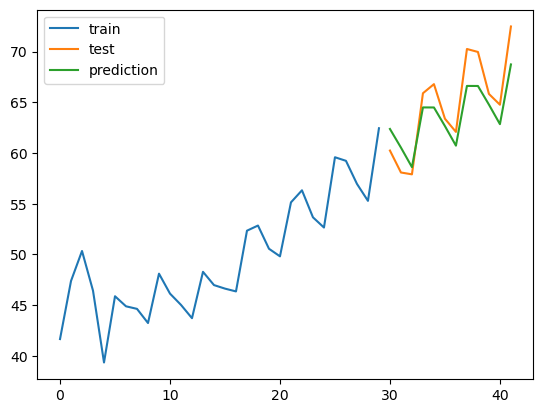

In [35]:
figsize = plt.figaspect(0.618) 
#plt.figure(figsize=(12,8))
train_data['Sales'].plot(legend=True, label='train')
test_data['Sales'].plot(legend=True, label='test')
df_test_prediction['test_pred_Sales'].plot(legend=True, label='prediction')
plt.plot()

In [36]:
# From the above plot it is seen that there is a slight difference in test and predicted test data.

#### Transforming sqrt to original form of data for test prediction DataFrame 

In [37]:
df_test_prediction['Sales'] = np.square(df_test_prediction['Sales'])
df_test_prediction['test_pred_Sales'] = np.square(df_test_prediction['test_pred_Sales'])
df_test_prediction.head()

,Quarter,Sales,test_pred_Sales
30,Q3_93,3629.0,3890.088999
31,Q4_93,3373.0,3664.336353
32,Q1_94,3352.0,3434.746268
33,Q2_94,4342.0,4159.585225
34,Q3_94,4461.0,4158.971183


#### Evaluation of metrics

In [38]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df_test_prediction['Sales'],df_test_prediction['test_pred_Sales'])            #MSE

94749.8467927001

In [39]:
np.sqrt(mean_squared_error(df_test_prediction['Sales'],df_test_prediction['test_pred_Sales']))   #RMSE

307.81463056960126

# Final Model Building(Forecating into Future)

In [40]:
model = ExponentialSmoothing(df["Sales"], trend="add", seasonal="add", seasonal_periods=4) #add the trend to the model
model_fit = model.fit()

In [41]:
forecasted  = model_fit.forecast(20)
forecasted

42    72.292088
43    70.035021
44    68.432882
45    74.887098
46    74.728082
47    72.471015
48    70.868876
49    77.323092
50    77.164076
51    74.907009
52    73.304870
53    79.759086
54    79.600070
55    77.343004
56    75.740864
57    82.195080
58    82.036064
59    79.778998
60    78.176858
61    84.631074
dtype: float64

<AxesSubplot:>

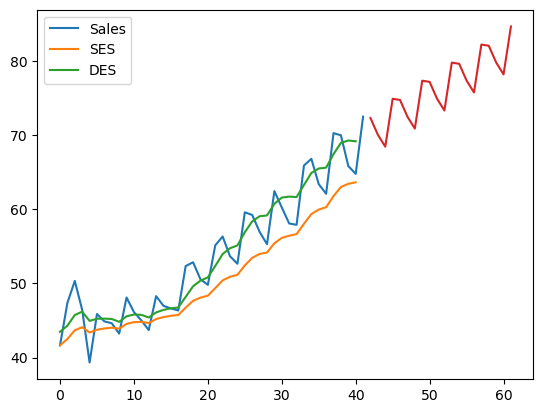

In [42]:
df.plot()
forecasted.plot()

In [43]:
df['Sales'] = np.square(df['Sales']) 
fore = np.square(forecasted)

In [44]:
df.head()

,Quarter,Sales,SES,DES
0,Q1_86,1734.827000,41.651254,43.478408
1,Q2_86,2244.960999,42.510719,44.297306
2,Q3_86,2533.804993,43.684649,45.743994
3,Q4_86,2154.962997,44.095188,46.192067
4,Q1_87,1547.818996,43.382260,44.954153


In [45]:
fore

42    5226.145956
43    4904.904222
44    4683.059326
45    5608.077420
46    5584.286214
47    5252.048079
48    5022.397579
49    5978.860536
50    5954.294606
51    5611.060071
52    5373.603967
53    6361.511786
54    6336.171132
55    5981.940196
56    5736.678488
57    6756.031170
58    6729.915792
59    6364.688456
60    6111.621143
61    7162.418688
dtype: float64

<AxesSubplot:>

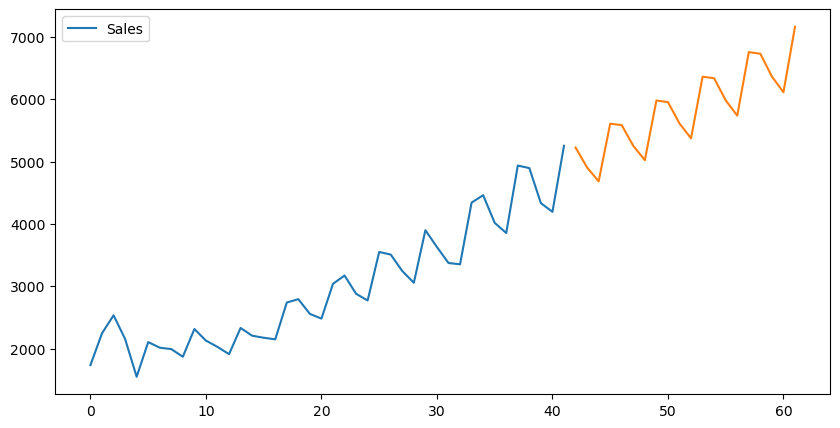

In [46]:
df[['Sales']].plot(figsize=(10,5));
fore.plot()

<AxesSubplot:>

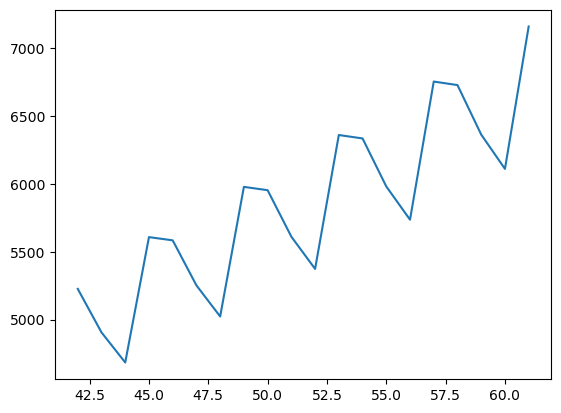

In [47]:
fore.plot()